Primeras filas del DataFrame:
                         0        1             2
0                 Column1  Column2       Column3
1  Flutter y React Nativa      NaN           NaN
2                     NaN      NaN           NaN
3                  Semana  Flutter  React Native
4              2019-12-01       31            37
Columnas detectadas: Index(['Semana', 'Flutter', 'React Native'], dtype='object')
Primeras filas procesadas del DataFrame:
        Semana Flutter React Native
0  2019-12-01      31           37
1  2019-12-08      32           36
2  2019-12-15      35           37
3  2019-12-22      29           29
4  2019-12-29      28           27


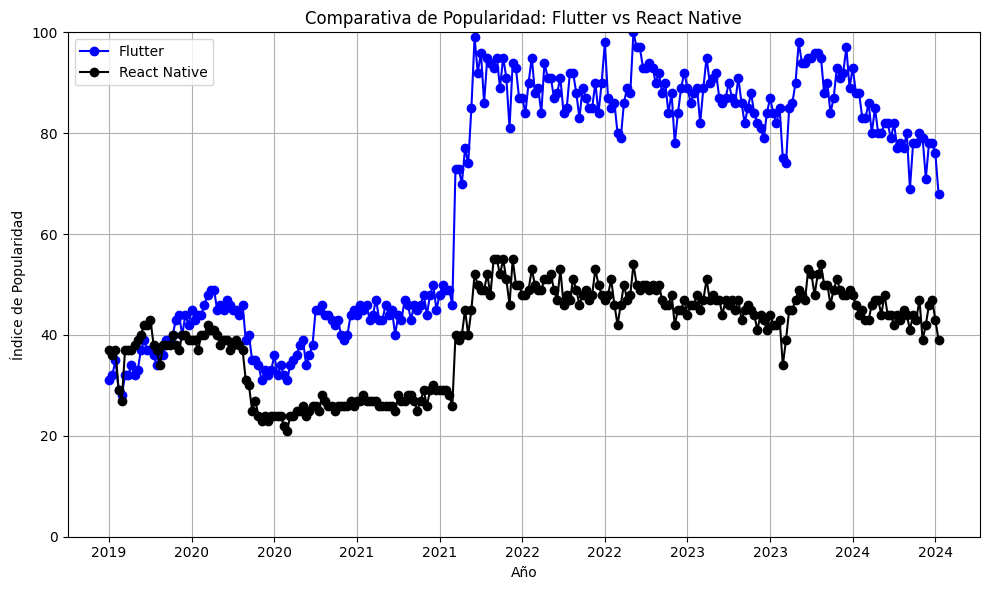

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Ruta del archivo
file_path = "D:/Documents/complementario-3125033/06-Sesión/Flutter - React Native/flutterReactNative.xlsx"

# Leer el archivo completo
data = pd.read_excel(file_path, header=None)  # No asumimos encabezados, cargamos todo
print("Primeras filas del DataFrame:\n", data.head())  # Verifica cómo se cargaron los datos

# Localizar los encabezados reales
headers_row = data[data.iloc[:, 0] == "Semana"].index[0]  # Encuentra la fila donde empieza "Semana"
data.columns = data.iloc[headers_row]  # Usa esa fila como nombres de columna
data = data[headers_row + 1:].reset_index(drop=True)  # Filtra los datos por debajo de los encabezados
data.columns.name = None  # Limpia el nombre del índice de columnas

# Verificar los nombres finales de las columnas
print("Columnas detectadas:", data.columns)
print("Primeras filas procesadas del DataFrame:\n", data.head())

# Extraer columnas relevantes
semanas = pd.to_datetime(data['Semana'], errors='coerce')  # Convertir la columna 'Semana' a datetime
flutter = pd.to_numeric(data['Flutter'], errors='coerce')  # Aseguramos conversión numérica
reactNative = pd.to_numeric(data['React Native'], errors='coerce')

# Graficar los datos
plt.figure(figsize=(10, 6))
plt.plot(semanas, flutter, label='Flutter', color='blue', marker='o')
plt.plot(semanas, reactNative, label='React Native', color='black', marker='o')

# Personalización del gráfico
plt.ylim(0, 100)
plt.xticks(semanas[::len(semanas)//10], [str(year) for year in semanas.dt.year[::len(semanas)//10]])  # Ajustar las etiquetas de años
plt.xlabel('Año')
plt.ylabel('Índice de Popularidad')
plt.title('Comparativa de Popularidad: Flutter vs React Native')
plt.legend()
plt.grid()

# Mover la leyenda al lado izquierdo
plt.legend(loc='upper left')  # Aquí se especifica la ubicación de la leyenda

# Mostrar la gráfica
plt.tight_layout()
plt.show()